In [1]:
import sys, os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import time
from sklearn.linear_model import LinearRegression

In [2]:
# data_path = Path("G:\My Drive\Colab Notebooks\Zillow\data")
data_path = Path("/Users/mikeshih/Documents/data/zillow_data")

if (not 'df' in locals()) and data_path.joinpath('dfall_logerr.csv').is_file():
    print('load cache')  
    df = pd.read_pickle(data_path.joinpath('dfall_logerr.pkl')) 
elif (not 'df' in locals()) or (not data_path.joinpath('dfall_logerr.csv').is_file()):
    print('export to csv')
    df = pd.read_pickle(data_path.joinpath('dfall_logerr.pkl'))
    df.to_csv(data_path.joinpath('dfall_logerr.csv'), index = False)
    
df.info()

load cache
<class 'pandas.core.frame.DataFrame'>
Int64Index: 167888 entries, 362 to 5970723
Data columns (total 61 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   parcelid                      167888 non-null  string 
 1   airconditioningtypeid         167888 non-null  string 
 2   architecturalstyletypeid      167888 non-null  string 
 3   basementsqft                  167888 non-null  int64  
 4   bathroomcnt                   167888 non-null  float64
 5   bedroomcnt                    167888 non-null  int64  
 6   buildingclasstypeid           167888 non-null  string 
 7   buildingqualitytypeid         167888 non-null  string 
 8   calculatedbathnbr             167888 non-null  float64
 9   decktypeid                    167888 non-null  string 
 10  finishedfloor1squarefeet      167888 non-null  int64  
 11  calculatedfinishedsquarefeet  167888 non-null  int64  
 12  finishedsquarefeet12          

In [3]:
def printunique(df):
    for colname in df.columns:
        col_tmp = df[colname]
        print(colname)
        print(col_tmp.unique())
    return

In [4]:
# df_2016 = df[df['year_data'] == 2016]
df.reset_index(inplace=True, drop=True)
df['transactiondate_month'] = pd.DatetimeIndex(df['transactiondate']).month
df['transactiondate_year'] = pd.DatetimeIndex(df['transactiondate']).year
df.info()
# printunique(df_2016)
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167888 entries, 0 to 167887
Data columns (total 63 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   parcelid                      167888 non-null  string 
 1   airconditioningtypeid         167888 non-null  string 
 2   architecturalstyletypeid      167888 non-null  string 
 3   basementsqft                  167888 non-null  int64  
 4   bathroomcnt                   167888 non-null  float64
 5   bedroomcnt                    167888 non-null  int64  
 6   buildingclasstypeid           167888 non-null  string 
 7   buildingqualitytypeid         167888 non-null  string 
 8   calculatedbathnbr             167888 non-null  float64
 9   decktypeid                    167888 non-null  string 
 10  finishedfloor1squarefeet      167888 non-null  int64  
 11  calculatedfinishedsquarefeet  167888 non-null  int64  
 12  finishedsquarefeet12          167888 non-nul

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,year_data,logerror,transactiondate,transactiondate_month,transactiondate_year
0,17073783,NA,NA,-1,2.5,3,NA,NA,2.5,NA,...,76724,2015.06,False,-1,61110022003007,2016,0.095300,2016-01-27,1,2016
1,17088994,NA,NA,-1,1.0,2,NA,NA,1.0,NA,...,95870,2581.30,False,-1,61110015031002,2016,0.019800,2016-03-30,3,2016
2,17100444,NA,NA,-1,2.0,3,NA,NA,2.0,NA,...,14234,591.64,False,-1,61110007011007,2016,0.006000,2016-05-27,5,2016
3,17102429,NA,NA,-1,1.5,2,NA,NA,1.5,NA,...,17305,682.78,False,-1,61110008002013,2016,-0.056600,2016-06-07,6,2016
4,17109604,NA,NA,-1,2.5,4,NA,NA,2.5,NA,...,277000,5886.92,False,-1,61110014021007,2016,0.057300,2016-08-08,8,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167883,11928618,NA,NA,-1,0.0,-1,NA,NA,0.0,NA,...,-1,0.00,False,-1,NA,2017,0.026665,2017-05-12,5,2017
167884,10813418,NA,NA,-1,0.0,-1,NA,NA,0.0,NA,...,-1,0.00,False,-1,NA,2017,-0.008083,2017-01-03,1,2017
167885,11934023,NA,NA,-1,0.0,-1,NA,NA,0.0,NA,...,-1,0.00,False,-1,NA,2017,-0.016600,2017-03-23,3,2017
167886,11490025,NA,NA,-1,0.0,-1,NA,NA,0.0,NA,...,-1,0.00,False,-1,NA,2017,0.108073,2017-03-23,3,2017


In [5]:
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167888 entries, 0 to 167887
Data columns (total 63 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   parcelid                      167888 non-null  string 
 1   airconditioningtypeid         167888 non-null  string 
 2   architecturalstyletypeid      167888 non-null  string 
 3   basementsqft                  167888 non-null  int64  
 4   bathroomcnt                   167888 non-null  float64
 5   bedroomcnt                    167888 non-null  int64  
 6   buildingclasstypeid           167888 non-null  string 
 7   buildingqualitytypeid         167888 non-null  string 
 8   calculatedbathnbr             167888 non-null  float64
 9   decktypeid                    167888 non-null  string 
 10  finishedfloor1squarefeet      167888 non-null  int64  
 11  calculatedfinishedsquarefeet  167888 non-null  int64  
 12  finishedsquarefeet12          167888 non-nul

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,year_data,logerror,transactiondate,transactiondate_month,transactiondate_year
0,17073783,NA,NA,-1,2.5,3,NA,NA,2.5,NA,...,76724,2015.06,False,-1,61110022003007,2016,0.095300,2016-01-27,1,2016
1,17088994,NA,NA,-1,1.0,2,NA,NA,1.0,NA,...,95870,2581.30,False,-1,61110015031002,2016,0.019800,2016-03-30,3,2016
2,17100444,NA,NA,-1,2.0,3,NA,NA,2.0,NA,...,14234,591.64,False,-1,61110007011007,2016,0.006000,2016-05-27,5,2016
3,17102429,NA,NA,-1,1.5,2,NA,NA,1.5,NA,...,17305,682.78,False,-1,61110008002013,2016,-0.056600,2016-06-07,6,2016
4,17109604,NA,NA,-1,2.5,4,NA,NA,2.5,NA,...,277000,5886.92,False,-1,61110014021007,2016,0.057300,2016-08-08,8,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167883,11928618,NA,NA,-1,0.0,-1,NA,NA,0.0,NA,...,-1,0.00,False,-1,NA,2017,0.026665,2017-05-12,5,2017
167884,10813418,NA,NA,-1,0.0,-1,NA,NA,0.0,NA,...,-1,0.00,False,-1,NA,2017,-0.008083,2017-01-03,1,2017
167885,11934023,NA,NA,-1,0.0,-1,NA,NA,0.0,NA,...,-1,0.00,False,-1,NA,2017,-0.016600,2017-03-23,3,2017
167886,11490025,NA,NA,-1,0.0,-1,NA,NA,0.0,NA,...,-1,0.00,False,-1,NA,2017,0.108073,2017-03-23,3,2017


<Axes: >

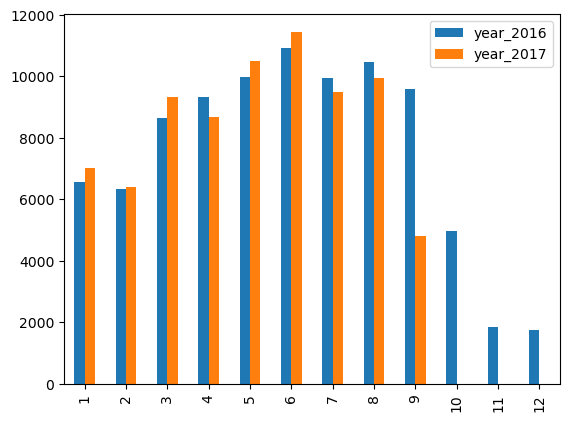

In [6]:
#print(df_2016_gb)
df_cat = []
for year in df['transactiondate_year'].unique():
    df_tmp = df[df['transactiondate_year'] == year]
    df_tmp_gb = df_tmp['transactiondate_month'].value_counts()
    df_tmp_gb.rename(f'year_{year}', inplace=True)
    df_cat.append(df_tmp_gb)
df_cat = pd.concat(df_cat, axis = 1)
df_cat.sort_index(inplace=True)
df_cat.plot(kind='bar')

In [8]:
# https://www.theclickreader.com/random-forest-regression/
from sklearn.preprocessing import OneHotEncoder # create one hot for strings
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import mean_squared_error # cost function
from sklearn.ensemble import RandomForestRegressor # call the regressor model
from sklearn.model_selection import cross_val_score

def seperate_string(df):
    colnms_string = []
    colnms_nostring = []
    for idx, value in enumerate(df.dtypes.items()):
        if value[1] == "string":
            colnms_string.append(value[0])
        else:
            colnms_nostring.append(value[0])

    df_string = df[colnms_string]
    df_nostring = df[colnms_nostring]

    return (df_nostring, df_string)

dropcol = ['parcelid', 'censustractandblock', 'transactiondate'] # remove id 
dropcol.extend(['logerror']) # remove prediction target

df_pre = df.drop(dropcol, axis = 1)
df_nostring, df_string = seperate_string(df_pre)
# df_string.info()
# printunique(df_string)

enc = OneHotEncoder(handle_unknown='ignore')
print(df_string.columns)

enc.fit(df_string)
dfarray = enc.transform(df_string).toarray()
dfcolnms = enc.get_feature_names_out(df_string.columns)

enc_df_string = pd.DataFrame(dfarray, columns = dfcolnms)

X = pd.concat([df_nostring, enc_df_string], axis = 1)
X.info()
y = df['logerror']

Index(['airconditioningtypeid', 'architecturalstyletypeid',
       'buildingclasstypeid', 'buildingqualitytypeid', 'decktypeid', 'fips',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'regionidzip', 'storytypeid',
       'typeconstructiontypeid'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167888 entries, 0 to 167887
Columns: 2934 entries, basementsqft to typeconstructiontypeid_NA
dtypes: bool(3), float64(2892), int64(39)
memory usage: 3.7 GB


In [9]:
display(X)

,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,...,regionidzip_97331,regionidzip_97344,regionidzip_NA,storytypeid_7,storytypeid_NA,typeconstructiontypeid_10,typeconstructiontypeid_13,typeconstructiontypeid_4,typeconstructiontypeid_6,typeconstructiontypeid_NA
0,-1,2.5,3,2.5,548,1264,1264,-1,-1,548,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1,1.0,2,1.0,777,777,777,-1,-1,777,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1,2.0,3,2.0,1101,1101,1101,-1,-1,1101,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-1,1.5,2,1.5,1554,1554,1554,-1,-1,1554,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-1,2.5,4,2.5,1305,2415,2415,-1,-1,1305,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167883,-1,0.0,-1,0.0,-1,-1,-1,-1,-1,-1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
167884,-1,0.0,-1,0.0,-1,-1,-1,-1,-1,-1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
167885,-1,0.0,-1,0.0,-1,-1,-1,-1,-1,-1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
167886,-1,0.0,-1,0.0,-1,-1,-1,-1,-1,-1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [12]:
split_randonstate = 1947
model_randonstate = 1949
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = split_randonstate)
model = RandomForestRegressor(n_estimators = 200, max_depth = 50, oob_score = True, n_jobs = 6, random_state = model_randonstate, verbose = 2)
model.fit(x_train, y_train)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200


[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:  2.2min


building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77

[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed: 11.2min


building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200


[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed: 15.2min finished


RandomForestRegressor(max_depth=50, n_estimators=200, n_jobs=6, oob_score=True,
                      random_state=1949, verbose=2)

In [13]:
y_pred = model.predict(x_test)
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.1s



RMSE:  0.167


[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.3s finished


In [6]:
model = RandomForestRegressor(n_estimators = 1000, max_depth = 20, oob_score = True, n_jobs = 8, verbose = 2)
score = cross_val_score(model, X, y, cv=5, verbose = 2, scoring = 'neg_mean_squared_error')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed: 13.9min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed: 67.4min


In [ ]:
print("Mean score of %0.2f with a standard deviation of %0.2f" % (score.mean(), score.std()))
print(score)

NameError: name 'scores' is not defined

In [8]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',